In [2]:
import pandas as pd
import numpy as np
import json
import datetime as dt
from datetime import datetime, date, time,timedelta
import pandas as pd
from csv import DictWriter
import urllib
import re,datetime
import os
import time
from os import walk
import re
import  gc

############
#INPUTS
#############

index = "BANKNIFTY"
index_file_path = "D:/Dispersion/Dispersion Data - 2016_2020/Banknifty - All Delta/BANKNIFTY.csv"
stfolder = "D:/Dispersion/Dispersion Data - 2016_2020/BN Dispersion - All Delta"
    
wgt_lot_path = "D:/Dispersion/Dispersion Data - 2021/BankNifty Weights/BN Mcap & includeok - Copy.csv"

direc = r"C:/Users/admin/Desktop/Dispersion Working Files - 16.22 - Only Correlation - Equal Weights"

output_path = r"C:/Users/admin/Desktop/Dispersion output files check - 16.22 - Only Correlation - Equal Weights"

index_lotsize = 1

initial_equity = 100000

#########################
#Creating Stock List
#######################

filename = next(walk(stfolder), (None, None, []))[2]  # [] if no file
stock_list_path = []
for i in filename:
    temp = stfolder +"/"+ i
    stock_list_path.append(temp)

stock_list = []
for i in stock_list_path:
    stock_list.append(i.replace(".csv","").replace(stfolder + "/",""))
print(stock_list)
    
######################################    
#Creating weight and lot dictionary
######################################

"""wgtlot_df = pd.read_csv(wgt_lot_path)
wgtlot_dict = wgtlot_df.set_index('Symbol').T.to_dict('list')
print(wgtlot_dict)
symbols = list(wgtlot_dict.keys())"""

### Now adding Columns for weights below

####################################

lookback_period = 15
std_dev = 2

#################
#EXPIRY DATES
####################
symbols = stock_list.copy()
symbols.append(index)

exp_file_path = "expiry_dates.csv"
exp_df = pd.read_csv(exp_file_path,parse_dates = ["curr_exp_date","Date"],dayfirst =True,usecols = ["curr_exp_date","Date"])
#exp_df.rename({'curr_date': 'Date'}, axis=1, inplace=True)

['AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'CANBK', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'RBLBANK', 'SBIN', 'YESBANK']


In [2]:
idx = pd.read_csv(index_file_path,parse_dates = ["Date"],dayfirst = True)
df1 = idx[idx['Ticker'].str.endswith('- I')]
df2 = idx[idx['Ticker'].str.endswith('- II')]
df3 = idx[idx['Ticker'].str.endswith('- III')]



index_file_path = direc + "/BANKNIFTY.csv"

df1.to_csv(index_file_path)
df2.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"))
df3.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-III"))

print(idx.shape[0])
print(df1.shape[0]+df2.shape[0]+df3.shape[0])
    
for i in stock_list:
    df = pd.read_csv(stfolder + '/' + i + ".csv",parse_dates = ["Date"],dayfirst = True)
    df1 = df[df['Ticker'].str.endswith('- I')]
    df2 = df[df['Ticker'].str.endswith('- II')]
    df3 = df[df['Ticker'].str.endswith('- III')]
    
    path = direc + '/' + i + ".csv"
    
    df1.to_csv(path)
    df2.to_csv(path.replace(i,i+"-II"))
    df3.to_csv(path.replace(i,i+"-III"))
    
    print(df.shape[0])
    print(df1.shape[0]+df2.shape[0]+df3.shape[0])

stfolder = direc
print(index_file_path)

1486826
343290
169540
169540
25538
25538
136480
136480
106465
106465
159450
159450
157490
157490
181844
181844
167624
167624
110306
110306
187784
187784
186026
186026
146610
146610
109058
109058
175724
175724
133296
133296
C:/Users/admin/Desktop/Dispersion Working Files - 16.22 - Only Correlation - Equal Weights/BANKNIFTY.csv


In [3]:
idx = pd.read_csv(index_file_path,usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')

idx_ce = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')

final.to_csv(output_path+"/check-1data.csv")

print(final)
for i in stock_list:
    print(i)
    df1 = pd.read_csv(stfolder+ '/' + i + ".csv",parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money"])


    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')
    
    
    df_ce = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    print(df1.shape[0], df_ce.shape[0], df_pe.shape[0])
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
    
final = final.T.drop_duplicates().T
curr_final_df = final.copy()
u = curr_final_df.select_dtypes(exclude=['datetime'])
curr_final_df[u.columns] = u.fillna(0)

curr_final_df.to_csv(output_path+"/check-2data.csv")


     BANKNIFTY_Date_CE   BANKNIFTY_Ticker_CE BANKNIFTY_OPT_Close_CE  \
0           2016-01-01  BANKNIFTY17000CE - I                 369.05   
1           2016-01-04  BANKNIFTY16600CE - I                 359.55   
2           2016-01-05  BANKNIFTY16500CE - I                 376.45   
3           2016-01-06  BANKNIFTY16400CE - I                 360.95   
4           2016-01-07  BANKNIFTY16100CE - I                 348.25   
...                ...                   ...                    ...   
1228        2020-12-24  BANKNIFTY30400CE - I                  359.8   
1229        2020-12-28  BANKNIFTY30900CE - I                 309.05   
1230        2020-12-29  BANKNIFTY31300CE - I                  279.2   
1231        2020-12-30  BANKNIFTY31300CE - I                 203.85   
1232        2020-12-31  BANKNIFTY31300CE - I                   0.05   

     BANKNIFTY_Strike_CE BANKNIFTY_IV_CE BANKNIFTY_EQ_Close_CE  \
0                17000.0           0.173            17033.8008   
1              

In [4]:
idx = pd.read_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"),usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')


idx_ce = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')
final.to_csv(output_path+"/check-3data.csv")

for i in stock_list:
    print(i)
    path  = stfolder+ '/' + i + ".csv"
    df1 = pd.read_csv(path.replace(i,i+"-II"),parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money"])
    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')

    
    df_ce = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    
    
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
final = final.T.drop_duplicates().T
next_final_df = final.copy()

next_final_df.to_csv(output_path+"/check-4.0data.csv")


u = next_final_df.select_dtypes(exclude=['datetime'])
next_final_df[u.columns] = u.fillna(0)

next_final_df.to_csv(output_path+"/check-4data.csv")


AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


In [5]:
replacedf = curr_final_df[curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"]]
restdf = curr_final_df[~(curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"])]

nextdf = next_final_df[next_final_df[index + "_Date_CE"] == next_final_df[index + "_curr_exp_date_CE"]]

print(replacedf.shape[0])
print(restdf.shape[0])
print(nextdf.shape[0])
print(next_final_df.shape[0])


for i in symbols:
    if nextdf.shape[0] == replacedf.shape[0]:
        replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
        replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]
        print("EXCHANGE DONE")
    else:
        print("Entries Missing Error")
        break

final = restdf.append(replacedf).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])

60
1173
60
1233


<ipython-input-5-af3cdaa66d50>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
<ipython-input-5-af3cdaa66d50>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]


EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE


<ipython-input-5-af3cdaa66d50>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = restdf.append(replacedf).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])


In [6]:
final.to_csv(output_path+"\Part-1data.csv")
data = pd.read_csv(output_path+"\Part-1data.csv",parse_dates = [index + "_Date_CE"],dayfirst = True)

In [7]:
#Adding Avg IV Columns
data[index + "_Avg IV"] = (data[index + "_IV_CE"] + data[index + "_IV_PE"])/2
curr_final_df[index + "_Avg IV"] = data[index + "_Avg IV"]
for i in stock_list:
    data[i + "_Avg IV"] = (data[i + "_IV_CE"] + data[i + "_IV_PE"])/2
    curr_final_df[i + "_Avg IV"] = data[i + "_Avg IV"]
data = curr_final_df.copy()

# Adding Weights Columns

In [8]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Equal_Weightage","date","includeok","Lotsize"])

In [9]:
grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

display(data)

<ipython-input-9-75bf10335f97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
<ipython-input-9-75bf10335f97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]
<ipython-input-9-75bf10335f97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

<ipython-input-9-75bf10335f97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
<ipython-input-9-75bf10335f97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]
<ipython-input-9-75bf10335f97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

7652
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,FEDERALBNK_OG_Weight,HDFCBANK_OG_Weight,ICICIBANK_OG_Weight,IDFCFIRSTB_OG_Weight,INDUSINDBK_OG_Weight,KOTAKBANK_OG_Weight,PNB_OG_Weight,RBLBANK_OG_Weight,SBIN_OG_Weight,YESBANK_OG_Weight
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,0.1730,...,8.333333,8.333333,8.333333,NaN,8.333333,8.333333,8.333333,NaN,8.333333,8.333333
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,0.2095,...,8.333333,8.333333,8.333333,NaN,8.333333,8.333333,8.333333,NaN,8.333333,8.333333
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,0.2116,...,8.333333,8.333333,8.333333,NaN,8.333333,8.333333,8.333333,NaN,8.333333,8.333333
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,0.2171,...,8.333333,8.333333,8.333333,NaN,8.333333,8.333333,8.333333,NaN,8.333333,8.333333
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,0.2334,...,8.333333,8.333333,8.333333,NaN,8.333333,8.333333,8.333333,NaN,8.333333,8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,0.2035,...,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,NaN
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,0.2480,...,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,NaN
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,0.2507,...,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,NaN
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,0.2497,...,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,8.333333,NaN


### Adding Final Weight Columns

In [10]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [11]:
u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,HDFCBANK_Final_Weight,ICICIBANK_Final_Weight,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,YESBANK_Final_Weight,BANKNIFTY_Final_Weight
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,0.1730,...,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,0.2095,...,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,0.2116,...,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,0.2171,...,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,0.2334,...,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,0.2035,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,1
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,0.2480,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,1
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,0.2507,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,1
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,0.2497,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,1


In [12]:
data['index_iv'] = data[index +'_Avg IV']*100
data['stock_iv']  = 0
for i in stock_list:
    data['stock_iv'] += data[i + '_Avg IV']*data[i + "_Final_Weight"] 
    
data['implied_correl'] = (data['index_iv']/data['stock_iv'])

print(data.isnull().sum().sum())

3952


<ipython-input-12-2324715696c9>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['index_iv'] = data[index +'_Avg IV']*100
<ipython-input-12-2324715696c9>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['stock_iv']  = 0
<ipython-input-12-2324715696c9>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

In [13]:
data['avg'] = data['implied_correl'].rolling(lookback_period).mean()
df = data.copy()

df.to_csv(output_path+'/impliedratio.csv')

<ipython-input-13-cb0553d5707b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['avg'] = data['implied_correl'].rolling(lookback_period).mean()


In [4]:
df = pd.read_csv(output_path+'/impliedratio.csv')

def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * std_dev # Calculate top band
    bollinger_down = sma - std * std_dev # Calculate bottom band
    return bollinger_up, bollinger_down

df['bollinger_up'], df['bollinger_down'] = get_bollinger_bands(df['implied_correl'], lookback_period)

df['sma'] = get_sma(df['implied_correl'], lookback_period)
df['long_avg'] = df['implied_correl'].mean()


#print(df['bollinger_up'])
#print(df['bollinger_down'])
#print(df['long_avg'])
#print(df['sma'])

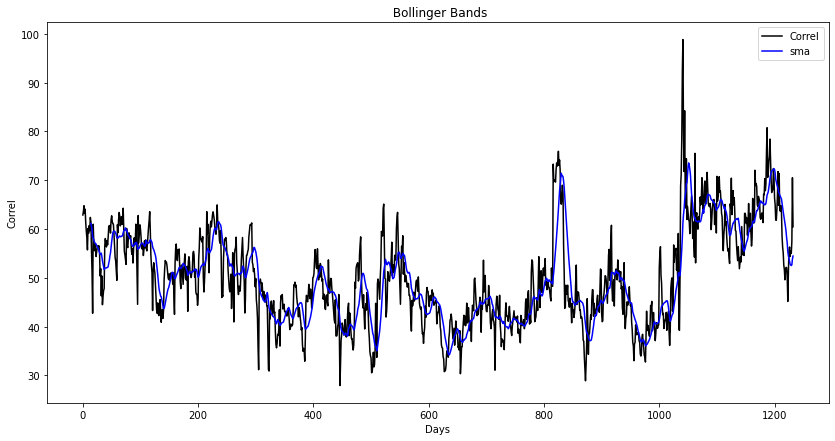

In [6]:
import matplotlib.pyplot as plt

df.head()

fig = plt.figure(figsize=(14,7))
plt.title(' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Correl')
plt.plot(df['implied_correl'], label='Correl', c = 'black')
# plt.plot(df['bollinger_up'], label='Bollinger Up', c='g')
# plt.plot(df['bollinger_down'], label='Bollinger Down', c='r')
plt.plot(df['sma'], label='sma', c='b')

plt.legend()
plt.show()

In [16]:
df.to_csv(output_path+"\series.csv")

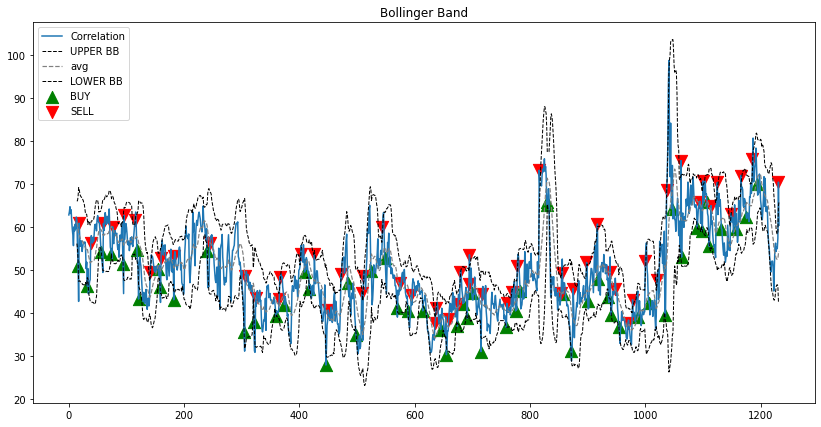

In [17]:
def implement_bb_strategy(data, lower_bb, upper_bb, avg):
    entry_ratio = []
    exit_ratio = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if(i==0):
            if data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            elif data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(0)
        else:
            if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] > avg[i-1] and data[i] < avg[i]:
                if signal != 0:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])                
            
            elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] < avg[i-1] and data[i] > avg[i]:
                if signal != 0:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(bb_signal[i-1])

    return entry_ratio, exit_ratio, bb_signal

df['entry_ratio'], df['exit_ratio'], df['bb_signal'] = implement_bb_strategy(df['implied_correl'], df['bollinger_down'], df['bollinger_up'], df['avg'])

fig = plt.figure(figsize=(14,7))


df['implied_correl'].plot(label = 'Correlation', alpha = 1)
df['bollinger_up'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['avg'].plot(label = 'avg', linestyle = '--', linewidth = 1.2, color = 'grey')
df['bollinger_down'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, df['entry_ratio'], marker = '^', color = 'green', label = 'BUY', s = 150)
plt.scatter(df.index, df['exit_ratio'], marker = 'v', color = 'red', label = 'SELL', s = 150)
plt.title('Bollinger Band')
plt.legend(loc = 'upper left')
plt.show()


In [18]:
df1 = df.copy()

In [19]:
df1['dispersion_entry'] = False #(df1['bb_signal'] == -1) & (df1['exit_ratio'] > 0)  & (df1['entry_ratio'].isna() == True)
df1['dispersion_exit'] = False #(df1['bb_signal'] == 0) & (df1['entry_ratio'] > 0) & (df1['entry_ratio'].isna() == False)

df1['correlation_entry'] = np.nan
df1['correlation_exit'] = np.nan
df1['bb_signal'] = np.nan

#df1['correlation_entry'] = (df1['bb_signal'] == 1) & (df1['entry_ratio'] > 0)  & (df1['exit_ratio'].isna() == True)
#df1['correlation_exit'] = (df1['bb_signal'] == 0)  & (df1['exit_ratio'] > 0)  & (df1['exit_ratio'].isna() == False):

df1['bb_signal'] = df1.apply(lambda x: 0 if x['BANKNIFTY_Date_CE']==x['BANKNIFTY_curr_exp_date_CE'] else 1, axis=1)



for i in range(len(df1)):
    if(i==0):
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i-1,'BANKNIFTY_Date_CE'] == df1.loc[i-1,'BANKNIFTY_curr_exp_date_CE']):  
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i,'BANKNIFTY_Date_CE'] == df1.loc[i,'BANKNIFTY_curr_exp_date_CE']):
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = True
    else:
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = False

display(df1)          
    

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,bollinger_down,sma,long_avg,entry_ratio,exit_ratio,bb_signal,dispersion_entry,dispersion_exit,correlation_entry,correlation_exit
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,0.1730,...,NaN,NaN,50.108694,NaN,NaN,1,False,False,True,False
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,0.2095,...,NaN,NaN,50.108694,NaN,NaN,1,False,False,False,False
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,0.2116,...,NaN,NaN,50.108694,NaN,NaN,1,False,False,False,False
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,0.2171,...,NaN,NaN,50.108694,NaN,NaN,1,False,False,False,False
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,0.2334,...,NaN,NaN,50.108694,NaN,NaN,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,0.2035,...,46.544701,52.612830,50.108694,NaN,NaN,1,False,False,False,False
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,0.2480,...,46.646452,52.529463,50.108694,NaN,NaN,1,False,False,False,False
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,0.2507,...,46.395788,52.686270,50.108694,NaN,NaN,1,False,False,False,False
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,0.2497,...,42.728253,53.879637,50.108694,NaN,70.521832,1,False,False,False,False


In [20]:
df2 = df1.copy()


# df2_index = df2.index
# exp_dates = list(df2_index[df2[index + "_curr_exp_date_CE"] == df2[index+"_Date_CE"]])
# print(exp_dates)
# for i in exp_dates:
#     if df2.iloc[i]["bb_signal"] == -1:
#         df2.loc[i,'dispersion_entry'] = False
#         df2.loc[i,'dispersion_exit'] = True
#         df2.loc[i,'correlation_entry'] = False
#         df2.loc[i,'correlation_exit'] = False
#         df2.loc[i,'bb_signal'] = 0
#         df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]

#         df2.loc[i+1,'dispersion_entry'] = True
#         df2.loc[i+1,'dispersion_exit'] = False
#         df2.loc[i+1,'correlation_entry'] = False
#         df2.loc[i+1,'correlation_exit'] = False
#         df2.loc[i+1,'bb_signal'] = -1
#         df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
#     elif df2.iloc[i]["bb_signal"] == 1:
#         df2.loc[i,'dispersion_entry'] = False
#         df2.loc[i,'dispersion_exit'] = False
#         df2.loc[i,'correlation_entry'] = False
#         df2.loc[i,'correlation_exit'] = True
#         df2.loc[i,'bb_signal'] = 0
#         df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]
        
#         df2.loc[i+1,'dispersion_entry'] = False
#         df2.loc[i+1,'dispersion_exit'] = False
#         df2.loc[i+1,'correlation_entry'] = True
#         df2.loc[i+1,'correlation_exit'] = False
#         df2.loc[i+1,'bb_signal'] = 1
#         df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
        
#     elif df2.iloc[i]["bb_signal"] == 0:
#         continue
        
# df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
#               (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df2.to_csv(output_path + '/with entry exit signals_all data.csv')

In [21]:
df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
              (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df.to_csv(output_path + '/with entry exit signals.csv')

In [22]:
trades = []

for i in df.index[:-1]:
    if df["bb_signal"][i] == -1:
        strikes = {}
        strikes[index] = df[index + "_Strike_CE"][i]
        for j in stock_list:
            strikes[j] = df[j+"_Strike_CE"][i]
        trades.append( 
                        { 
                          "entry_date": df[index + "_Date_CE"][i],
                          "exit_date" : df[index + "_Date_CE"][i+1],
                          "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                          "type_of_trade": "SILS",
                          "strike" : strikes,
                          "entry_ratio" : df["exit_ratio"][i],
                          "exit_ratio" : df["entry_ratio"][i+1],
                            
                        }
                      )
                            
    if df["bb_signal"][i] == 1:
            strikes = {}
            strikes[index] = df[index + "_Strike_CE"][i]
            for j in stock_list:
                strikes[j] = df[j+"_Strike_CE"][i]
            trades.append( 
                            { 
                              "entry_date": df[index + "_Date_CE"][i],
                              "exit_date" : df[index + "_Date_CE"][i+1],
                              "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                              "type_of_trade": "LISS",
                              "strike" : strikes,
                              "entry_ratio" : df["entry_ratio"][i],
                              "exit_ratio" : df["exit_ratio"][i+1],
                            }
                          )

In [23]:
for i in trades:
    date1 = i["entry_date"]
    date2 = i["exit_date"]
    expiry = i["expiry_date"]
    print(date1)
    print(date2)
    
    if expiry == date1:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        nextdf = pd.read_csv(index_file_path.replace(index,index+"-II"),parse_dates = ["Date"])
        
        df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
        nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][index])]
        nextdf = nextdf.append(df)
        nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = nextdf

        for j in stock_list:
            print("#######################",j)
            print(i["strike"][j])
            path = stfolder + '/' + j + ".csv"
            df = pd.read_csv(path,parse_dates = ["Date"])
            nextdf = pd.read_csv(path.replace(j,j+"-II"),parse_dates = ["Date"])
        
            df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][j])]
            nextdf = nextdf.append(df)
            nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
            df_dict[j] = nextdf
        i["dataframes"] = df_dict
    
    else:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
        df = pd.merge(df, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = df

        for j in stock_list:
            print("#######################",j)
            print(i["strike"][j])
            df = pd.read_csv(stfolder + '/' + j + ".csv",parse_dates = ["Date"])
            df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            df = pd.merge(df, exp_df, on = 'Date', how = 'left')
            df_dict[j] = df
        i["dataframes"] = df_dict

2016-01-01 00:00:00
2016-01-28 00:00:00
####################### AXISBANK
450.0
####################### BANDHANBNK
0.0
####################### BANKBARODA
160.0
####################### BANKINDIA
117.5
####################### CANBK
240.0
####################### FEDERALBNK
57.5
####################### HDFCBANK
540.0
####################### ICICIBANK
240.9090909
####################### IDFCFIRSTB
0.0
####################### INDUSINDBK
960.0
####################### KOTAKBANK
730.0
####################### PNB
117.5
####################### RBLBANK
0.0
####################### SBIN
230.0
####################### YESBANK
148.0
2016-01-29 00:00:00
2016-02-25 00:00:00
####################### AXISBANK
410.0
####################### BANDHANBNK
0.0
####################### BANKBARODA
125.0
####################### BANKINDIA
100.0
####################### CANBK
195.0
####################### FEDERALBNK
45.0
####################### HDFCBANK
520.0
####################### ICICIBANK
209.0909091
#################

####################### BANKINDIA
115.0
####################### CANBK
280.0
####################### FEDERALBNK
77.5
####################### HDFCBANK
650.0
####################### ICICIBANK
245.4545455
####################### IDFCFIRSTB
62.5
####################### INDUSINDBK
1260.0
####################### KOTAKBANK
790.0
####################### PNB
135.0
####################### RBLBANK
0.0
####################### SBIN
265.0
####################### YESBANK
280.0
2017-02-27 00:00:00
2017-03-30 00:00:00
####################### AXISBANK
510.0
####################### BANDHANBNK
0.0
####################### BANKBARODA
165.0
####################### BANKINDIA
125.0
####################### CANBK
290.0
####################### FEDERALBNK
82.5
####################### HDFCBANK
700.0
####################### ICICIBANK
254.5454545
####################### IDFCFIRSTB
62.5
####################### INDUSINDBK
1320.0
####################### KOTAKBANK
800.0
####################### PNB
140.0
##################

####################### HDFCBANK
940.0
####################### ICICIBANK
320.0
####################### IDFCFIRSTB
52.5
####################### INDUSINDBK
1640.0
####################### KOTAKBANK
1080.0
####################### PNB
110.0
####################### RBLBANK
490.0
####################### SBIN
280.0
####################### YESBANK
320.0
2018-04-02 00:00:00
2018-04-26 00:00:00
####################### AXISBANK
500.0
####################### BANDHANBNK
0.0
####################### BANKBARODA
140.0
####################### BANKINDIA
105.0
####################### CANBK
260.0
####################### FEDERALBNK
90.0
####################### HDFCBANK
970.0
####################### ICICIBANK
260.0
####################### IDFCFIRSTB
47.5
####################### INDUSINDBK
1800.0
####################### KOTAKBANK
1100.0
####################### PNB
95.0
####################### RBLBANK
480.0
####################### SBIN
245.0
####################### YESBANK
310.0
2018-04-27 00:00:00
2018-05-31 0

####################### INDUSINDBK
1780.0
####################### KOTAKBANK
1340.0
####################### PNB
95.0
####################### RBLBANK
680.0
####################### SBIN
320.0
####################### YESBANK
280.0
2019-04-26 00:00:00
2019-05-30 00:00:00
####################### AXISBANK
760.0
####################### BANDHANBNK
0.0
####################### BANKBARODA
122.5
####################### BANKINDIA
92.5
####################### CANBK
275.0
####################### FEDERALBNK
96.0
####################### HDFCBANK
1140.0
####################### ICICIBANK
405.0
####################### IDFCFIRSTB
52.0
####################### INDUSINDBK
1700.0
####################### KOTAKBANK
1380.0
####################### PNB
87.5
####################### RBLBANK
670.0
####################### SBIN
315.0
####################### YESBANK
240.0
2019-05-31 00:00:00
2019-06-27 00:00:00
####################### AXISBANK
810.0
####################### BANDHANBNK
0.0
####################### BANKBARODA

####################### SBIN
180.0
####################### YESBANK
25.0
2020-05-29 00:00:00
2020-06-25 00:00:00
####################### AXISBANK
380.0
####################### BANDHANBNK
220.0
####################### BANKBARODA
39.0
####################### BANKINDIA
0.0
####################### CANBK
85.0
####################### FEDERALBNK
45.0
####################### HDFCBANK
950.0
####################### ICICIBANK
330.0
####################### IDFCFIRSTB
22.0
####################### INDUSINDBK
390.0
####################### KOTAKBANK
1220.0
####################### PNB
27.0
####################### RBLBANK
120.0
####################### SBIN
162.5
####################### YESBANK
0.0
2020-06-26 00:00:00
2020-07-30 00:00:00
####################### AXISBANK
420.0
####################### BANDHANBNK
340.0
####################### BANKBARODA
52.0
####################### BANKINDIA
0.0
####################### CANBK
105.0
####################### FEDERALBNK
53.0
####################### HDFCBANK
1060.

In [24]:
for i in trades:
    print(i["dataframes"]['BANKNIFTY'].columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Date', 'Ticker', 'OPT_Open', 'OPT_High',
       'OPT_Low', 'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike',
       'Option_Type', 'IV', 'Delta', 'Theta', 'Gamma', 'Vega', 'EQ_Open',
       'EQ_High', 'EQ_Low', 'EQ_Close', 'Ticker_Type', 'At The Money',
       'Delta_15_Diff', 'Delta_15_Diff_Min', 'Delta_15_Strike',
       'Delta_20_Diff', 'Delta_20_Diff_Min', 'Delta_20_Strike',
       'Delta_25_Diff', 'Delta_25_Diff_Min', 'Delta_25_Strike',
       'Delta_30_Diff', 'Delta_30_Diff_Min', 'Delta_30_Strike',
       'Delta_35_Diff', 'Delta_35_Diff_Min', 'Delta_35_Strike',
       'Delta_40_Diff', 'Delta_40_Diff_Min', 'Delta_40_Strike',
       'Delta_45_Diff', 'Delta_45_Diff_Min', 'Delta_45_Strike',
       'Delta_50_Strike', 'curr_exp_date'],
      dtype='object')
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Date', 'Ticker', 'OPT_Open', 'OPT_High',
       'OPT_Low', 'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike',
       'Option_Type', 'IV', 'Delta', 'Theta', '

In [25]:
result = pd.DataFrame()
for trade_dict in trades:
    df_dict = trade_dict["dataframes"]
    entry = trade_dict["entry_date"]
    exit = trade_dict["exit_date"]
    
    idx = df_dict[index][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date"]]
    
    idx_ce = idx[(idx["Option_Type"] == "CE")].add_suffix("_CE")
    idx_pe = idx[(idx["Option_Type"] == "PE")].add_suffix("_PE")

    final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    final = final.add_prefix(index +"_")
    
    for i in df_dict:
        if i == index:
            continue
        df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date"]]
        df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
        df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")

        temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
        temp = temp.T.drop_duplicates().T
        temp = temp.add_prefix(i +"_")
        
        final = final.merge(temp,left_on=index + '_Date_CE' , right_on= i + '_Date_CE', how = 'left')
    final["Trade_Type"] = trade_dict["type_of_trade"]
    
    conditions = [
    (final[index + '_Date_CE'] == entry),
    (final[index + '_Date_CE'] == exit),
    (final[index + '_Date_CE'] != exit) & (final[index + '_Date_CE'] != entry)]

    # create a list of the values we want to assign for each condition
    values = ['F', 'L', 'M']

    # create a new column and use np.select to assign values to it using our lists as arguments
    final['D_marker'] = np.select(conditions, values)
    result = result.append(final)
        
result = result.T.drop_duplicates().T

<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(fi

<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(fi

In [26]:
data = result.copy()

In [27]:
display(data)
data.to_csv(output_path + '/before_weigt_add_second_time.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,Trade_Type,D_marker
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.173,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5,0.173,...,4.05,148.0,0.2835,146.49,2016-01-28,YESBANK148PE - I,4.59,0.2569,LISS,F
1,2016-01-04,BANKNIFTY17000CE - I,183.95,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.1,0.2012,...,2.23,148.0,0.322,141.15,2016-01-28,YESBANK148PE - I,8.45,0.3111,LISS,M
2,2016-01-05,BANKNIFTY17000CE - I,156.4,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.0,0.1993,...,2.24,148.0,0.3204,141.54,2016-01-28,YESBANK148PE - I,8.0,0.3022,LISS,M
3,2016-01-06,BANKNIFTY17000CE - I,115.6,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.8,0.2081,...,2.01,148.0,0.3285,140.77,2016-01-28,YESBANK148PE - I,7.82,0.2419,LISS,M
4,2016-01-07,BANKNIFTY17000CE - I,59.35,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.9,0.2076,...,1.08,148.0,0.3594,135.77,2016-01-28,YESBANK148PE - I,12.6,0.3253,LISS,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2020-12-24,BANKNIFTY29600CE - I,936.8,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.4,0.2165,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,LISS,M
19,2020-12-28,BANKNIFTY29600CE - I,1360.85,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,0.3159,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,LISS,M
20,2020-12-29,BANKNIFTY29600CE - I,1770.65,29600.0,0.5328,31322.5,2020-12-31,BANKNIFTY29600PE - I,12.75,0.421,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,LISS,M
21,2020-12-30,BANKNIFTY29600CE - I,1734.05,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.2,0.5229,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,LISS,M


### Adding Weight and Lot Columns Again

In [28]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Equal_Weightage","date","Lotsize"])

In [29]:


grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
data[index + "_Lotsize"] = index_lotsize
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
    d1[i + "_Lotsize"] = d1["Lotsize"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight",i+ "_Lotsize"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

data.to_csv(output_path + '/weigt_add_second_time.csv')

<ipython-input-29-528328e01ff1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
<ipython-input-29-528328e01ff1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_Lotsize"] = d1["Lotsize"]
<ipython-input-29-528328e01ff1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

<ipython-input-29-528328e01ff1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]
<ipython-input-29-528328e01ff1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
<ipython-input-29-528328e01ff1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

28473
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,KOTAKBANK_OG_Weight,KOTAKBANK_Lotsize,PNB_OG_Weight,PNB_Lotsize,RBLBANK_OG_Weight,RBLBANK_Lotsize,SBIN_OG_Weight,SBIN_Lotsize,YESBANK_OG_Weight,YESBANK_Lotsize
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.50,0.1730,...,8.333333,1,8.333333,1,0.000000,0.0,8.333333,1,8.333333,1.0
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.10,0.2012,...,8.333333,1,8.333333,1,0.000000,0.0,8.333333,1,8.333333,1.0
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.00,0.1993,...,8.333333,1,8.333333,1,0.000000,0.0,8.333333,1,8.333333,1.0
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.80,0.2081,...,8.333333,1,8.333333,1,0.000000,0.0,8.333333,1,8.333333,1.0
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.90,0.2076,...,8.333333,1,8.333333,1,0.000000,0.0,8.333333,1,8.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.40,0.2165,...,8.333333,1,8.333333,1,8.333333,1.0,8.333333,1,0.000000,0.0
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,0.3159,...,8.333333,1,8.333333,1,8.333333,1.0,8.333333,1,0.000000,0.0
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,BANKNIFTY29600PE - I,12.75,0.4210,...,8.333333,1,8.333333,1,8.333333,1.0,8.333333,1,0.000000,0.0
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.20,0.5229,...,8.333333,1,8.333333,1,8.333333,1.0,8.333333,1,0.000000,0.0


### Adding Final Weight Columns

In [30]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [31]:
filter_col = [col for col in data if col.endswith('Final_Weight')]
filter_col.remove(index + "_Final_Weight")
print(filter_col)

data[filter_col] = data[filter_col].replace(0,np.nan)

data["Min_Share_Value"] = data[filter_col].min(axis = 1)
data["Min_Share_Name"] = data[filter_col].idxmin(axis=1)
print(data["Min_Share_Value"])
print(data["Min_Share_Name"])

data[filter_col] = data[filter_col].replace(np.nan,0)

['AXISBANK_Final_Weight', 'BANDHANBNK_Final_Weight', 'BANKBARODA_Final_Weight', 'BANKINDIA_Final_Weight', 'CANBK_Final_Weight', 'FEDERALBNK_Final_Weight', 'HDFCBANK_Final_Weight', 'ICICIBANK_Final_Weight', 'IDFCFIRSTB_Final_Weight', 'INDUSINDBK_Final_Weight', 'KOTAKBANK_Final_Weight', 'PNB_Final_Weight', 'RBLBANK_Final_Weight', 'SBIN_Final_Weight', 'YESBANK_Final_Weight']
0       0.083333
1       0.083333
2       0.083333
3       0.083333
4       0.083333
          ...   
1228    0.083333
1229    0.083333
1230    0.083333
1231    0.083333
1232    0.083333
Name: Min_Share_Value, Length: 1233, dtype: float64
0       AXISBANK_Final_Weight
1       AXISBANK_Final_Weight
2       AXISBANK_Final_Weight
3       AXISBANK_Final_Weight
4       AXISBANK_Final_Weight
                ...          
1228    AXISBANK_Final_Weight
1229    AXISBANK_Final_Weight
1230    AXISBANK_Final_Weight
1231    AXISBANK_Final_Weight
1232    AXISBANK_Final_Weight
Name: Min_Share_Name, Length: 1233, dtype: object


In [32]:
display(data)
data.to_csv(output_path + '/before_qty_add.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,YESBANK_Final_Weight,BANKNIFTY_Final_Weight,Min_Share_Value,Min_Share_Name
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.50,0.1730,...,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1,0.083333,AXISBANK_Final_Weight
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.10,0.2012,...,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1,0.083333,AXISBANK_Final_Weight
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.00,0.1993,...,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1,0.083333,AXISBANK_Final_Weight
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.80,0.2081,...,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1,0.083333,AXISBANK_Final_Weight
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.90,0.2076,...,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.083333,1,0.083333,AXISBANK_Final_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.40,0.2165,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,1,0.083333,AXISBANK_Final_Weight
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,0.3159,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,1,0.083333,AXISBANK_Final_Weight
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,BANKNIFTY29600PE - I,12.75,0.4210,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,1,0.083333,AXISBANK_Final_Weight
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.20,0.5229,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,1,0.083333,AXISBANK_Final_Weight


In [33]:
#ADDING QTYS
result = data.copy()
min_exp = []
for idi, row in result.iterrows():
    min_share_stock = row['Min_Share_Name'].replace("_Final_Weight","")
    #print(min_share_stock)
    value  = row[min_share_stock + "_EQ_Close_CE"]*row[min_share_stock + "_Lotsize"]
    min_exp.append(value)
    
result["MinExp"] = min_exp
result[index + "_exp"] = (result["MinExp"]/result["Min_Share_Value"])
#result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"])).astype(int)
result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"]))
result[index + "_qty"] = result[index + "_lot"]*result[index + "_Lotsize"]

result.to_csv(output_path + '/resultt.csv')

#for stocks with includeok=0, making '_Lotsize' & '_EQ_Close_CE' non-zero

filter_col_Lotsize = [col for col in result if col.endswith('_Lotsize')]
filter_col_Lotsize.remove(index + "_Lotsize")
print(filter_col_Lotsize)
result[filter_col_Lotsize] = result[filter_col_Lotsize].replace(0,1)


filter_col_EQ_Close = [col for col in result if col.endswith('_EQ_Close_CE')]
filter_col_EQ_Close.remove(index + "_EQ_Close_CE")
print(filter_col_EQ_Close)
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(0,1)

result['index_exp'] = result[index + "_exp"]

result.to_csv(output_path + '/resulttcheckcheck.csv')

result['stock_exp'] = 0

for i in stock_list:
    print(i)
    if(i==min_share_stock):
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = result["MinExp"]
        result[i  + "_lot"] = 1
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        
    else:
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = (result[index + "_exp"]*result[i + "_Final_Weight"])
#         result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"])).astype(int)
        result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"]))
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        

['AXISBANK_Lotsize', 'BANDHANBNK_Lotsize', 'BANKBARODA_Lotsize', 'BANKINDIA_Lotsize', 'CANBK_Lotsize', 'FEDERALBNK_Lotsize', 'HDFCBANK_Lotsize', 'ICICIBANK_Lotsize', 'IDFCFIRSTB_Lotsize', 'INDUSINDBK_Lotsize', 'KOTAKBANK_Lotsize', 'PNB_Lotsize', 'RBLBANK_Lotsize', 'SBIN_Lotsize', 'YESBANK_Lotsize']
['AXISBANK_EQ_Close_CE', 'BANDHANBNK_EQ_Close_CE', 'BANKBARODA_EQ_Close_CE', 'BANKINDIA_EQ_Close_CE', 'CANBK_EQ_Close_CE', 'FEDERALBNK_EQ_Close_CE', 'HDFCBANK_EQ_Close_CE', 'ICICIBANK_EQ_Close_CE', 'IDFCFIRSTB_EQ_Close_CE', 'INDUSINDBK_EQ_Close_CE', 'KOTAKBANK_EQ_Close_CE', 'PNB_EQ_Close_CE', 'RBLBANK_EQ_Close_CE', 'SBIN_EQ_Close_CE', 'YESBANK_EQ_Close_CE']
AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


In [34]:
result['total_exposure'] = (result['index_exp'] + result['stock_exp'])*2

conditions = [
    (result["Trade_Type"] == "LISS"),
    (result["Trade_Type"] == "SILS")]

values = [result['total_exposure']/10,result['total_exposure']/10]
result['margin'] = np.select(conditions, values)

result['units'] = (initial_equity/result['margin']).astype(int)

result.to_csv(output_path+"/final2.csv")

In [35]:
conditions = [
    (result["D_marker"] == "F"),
    (result["D_marker"] != "F")]

values = [result[index + "_qty"]*result['units'],np.nan]
result[index + '_qty_final'] = np.select(conditions, values)

for i in stock_list:
    values = [result[i + "_qty"]*result['units'],np.nan]
    result[i + '_qty_final'] = np.select(conditions, values)

In [36]:
result = result.ffill()

In [37]:
display(result)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,FEDERALBNK_qty_final,HDFCBANK_qty_final,ICICIBANK_qty_final,IDFCFIRSTB_qty_final,INDUSINDBK_qty_final,KOTAKBANK_qty_final,PNB_qty_final,RBLBANK_qty_final,SBIN_qty_final,YESBANK_qty_final
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.50,0.1730,...,363.395961,38.016459,86.558711,0.000000,21.471598,28.457064,175.981293,0.000000,90.848990,141.275172
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.10,0.2012,...,363.395961,38.016459,86.558711,0.000000,21.471598,28.457064,175.981293,0.000000,90.848990,141.275172
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.00,0.1993,...,363.395961,38.016459,86.558711,0.000000,21.471598,28.457064,175.981293,0.000000,90.848990,141.275172
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.80,0.2081,...,363.395961,38.016459,86.558711,0.000000,21.471598,28.457064,175.981293,0.000000,90.848990,141.275172
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.90,0.2076,...,363.395961,38.016459,86.558711,0.000000,21.471598,28.457064,175.981293,0.000000,90.848990,141.275172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.40,0.2165,...,325.707006,14.196065,43.212000,556.582313,23.849356,10.725395,611.491779,91.395889,83.743705,0.000000
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,0.3159,...,325.707006,14.196065,43.212000,556.582313,23.849356,10.725395,611.491779,91.395889,83.743705,0.000000
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,BANKNIFTY29600PE - I,12.75,0.4210,...,325.707006,14.196065,43.212000,556.582313,23.849356,10.725395,611.491779,91.395889,83.743705,0.000000
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.20,0.5229,...,325.707006,14.196065,43.212000,556.582313,23.849356,10.725395,611.491779,91.395889,83.743705,0.000000


# Adding Next mOnth Close COlumns 

In [38]:
# for i in symbols:
#     for j in ["PE","CE"]:
#         temp = []
#         for idi, row in result.iterrows():
#             strike = row[i+"_Strike_CE"]
#             date = row[index+"_Date_CE"]
#             path = direc + "/" + i + "-II.csv" 

#             df1 = pd.read_csv(path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
#                                                                             "OPT_Close","EQ_Close","IV","At The Money"])
#             df1 = df1[(df1["Date"] == date)&(df1["Strike"]==strike)&(df1["Option_Type"]==j)]
#             if df1.shape[0] == 1:
#                 print("1 entry only!")
#             else:
#                 print(i)
#                 print(df1)
#                 print(date)
#                 print(strike)
#                 print(j)
#                 print("Error")  
#                 break
#             close2 = list(df1["OPT_Close"])[0]
#             temp.append(close2)
#         result[i + "_Next_Month_Close_"+j] = temp
# print(print(result.isnull().sum().sum()))
# display(result)

In [39]:
# print(symbols)
# print(result.isnull().sum().sum())
# resultp1 = result[(result[index+ "_Date_CE"] == result[index+ "_curr_exp_date_CE"]) & (result["D_marker"] == "M")]
# resultp2 = result[~((result[index+ "_Date_CE"] == result[index+ "_curr_exp_date_CE"]) & (result["D_marker"] == "M"))]

# if resultp1.shape[0] + resultp2.shape[0] == result.shape[0]:
#     print("Check Successful")
# else:
#     raise Exception("Check Unsuccessful")

# for i in symbols:
#     resultp2[i+"_Expiry_PL_Adj_CE"] = 0
#     resultp2[i+"_Expiry_PL_Adj_PE"] = 0

# if resultp1.shape[0] == 0:
#     print("No_expiry_adj")
# else:
#     for i in symbols:
#         for j in ["CE","PE"]:
#             temp = []
#             for idi, row in resultp1.iterrows():
#                 strike = row[i+"_Strike_CE"]
#                 date = row[index+"_Date_CE"]
#                 close = row[i + "_OPT_Close_"+ j]
#                 tradetype = row["Trade_Type"]
                
#                 path = direc + "/" + i + "-II.csv" 
                
#                 df1 = pd.read_csv(path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
#                                                                                 "OPT_Close","EQ_Close","IV","At The Money"])
#                 df1 = df1[(df1["Date"] == date)&(df1["Strike"]==strike)&(df1["Option_Type"]==j)]
                
#                 if df1.shape[0] == 1:
#                     print("1 entry only!")
#                 else:
#                     print("Error")  
#                     break
    
#                 close2 = list(df1["OPT_Close"])[0]
                
#                 if tradetype == "SILS":
#                     if i == index:
#                         adj = close2 - close
#                     else:
#                         adj = close - close2
#                 elif tradetype == "LISS":
#                     if i == index:
#                         adj = close - close2
#                     else:
#                         adj = close2 - close
#                 else:
#                     print("Error")
#                     break
#                 temp.append(adj)
#             resultp1[i+ "_Expiry_PL_Adj_"+ j] = temp
# print(resultp1.isnull().sum().sum())
# print(resultp2.isnull().sum().sum())
# result = resultp1.append(resultp2).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])

In [40]:
plvalue = []
pl = 0

for idi, row in result.iterrows():
    pval = 0
    if row["D_marker"] == "F":

        result.loc[idi, 'pl_check'] = pl + initial_equity
        result.loc[idi+1:, 'pl_check'] = np.nan

        result.loc[idi , 'units_new'] = ((result.loc[idi ,'pl_check'])/result.loc[idi, 'margin'])
        result.loc[idi+1: , 'units_new'] = np.nan
       
        result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
        result.loc[idi+1:, index + '_qty_final'] = np.nan
        
        result.loc[idi, 'plvalue_' + index] = 0

        for i in stock_list:                                                                    
            result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']
            result.loc[idi+1:, i + '_qty_final'] = np.nan
            result.loc[idi, 'plvalue_' + i] = 0
        
        result = result.ffill()

        
    else:
            if row["Trade_Type"] == "SILS":
                plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
                plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
                pval = plvalce + plvalpe

                result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe
                
                for i in stock_list:
                    plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] - result.loc[idi-1, i + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_PE"] - result.loc[idi-1, i + "_OPT_Close_PE"])
                    pval += plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 
                    
            if row["Trade_Type"] == "LISS":
                plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
                plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
                pval = plvalce + plvalpe

                result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe
                
                for i in stock_list:
                    plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] - result.loc[idi, i + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_PE"] - result.loc[idi, i + "_OPT_Close_PE"])
                    pval += plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 
            
            pl += pval
        
        
    plvalue.append(pval)

result["Daily_PL"] = plvalue

result.to_csv(output_path+"\pl_final4.csv")


In [41]:
result.loc[0,'Daily_PL'] = initial_equity
result["PortfolioValue"] = result["Daily_PL"].cumsum()
result.loc[0,'Daily_PL'] = 0

display(result)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,plvalue_ICICIBANK,plvalue_IDFCFIRSTB,plvalue_INDUSINDBK,plvalue_KOTAKBANK,plvalue_PNB,plvalue_RBLBANK,plvalue_SBIN,plvalue_YESBANK,Daily_PL,PortfolioValue
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.50,0.1730,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,100000.000000
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.10,0.2012,...,-1.861478e+02,0.000000,-19.453234,-169.015698,-1.505811e+02,0.000000,-251.499854,-290.122193,-582.919569,99417.080431
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.00,0.1993,...,1.346594e+02,0.000000,41.067939,35.808411,-1.417234e+02,0.000000,-96.027217,62.575375,-192.747095,99224.333336
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.80,0.2081,...,-6.732969e+01,0.000000,36.744998,-4.297009,-7.086168e+01,0.000000,-54.872695,58.308872,582.173046,99806.506382
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.90,0.2076,...,-5.861874e+02,0.000000,-104.831319,-173.312708,-5.491780e+02,0.000000,-489.281534,-547.534530,-2366.241358,97440.265024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.40,0.2165,...,-1.370784e+03,410.606245,457.452652,-580.771755,-4.511145e+02,256.216095,-729.004700,0.000000,3943.606871,291169.191892
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,0.3159,...,-7.204585e+02,739.091240,577.094115,-566.529396,1.624012e+03,579.857478,-1655.705590,0.000000,6121.613634,297290.805526
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,BANKNIFTY29600PE - I,12.75,0.4210,...,-9.754880e+02,410.606245,-1569.414482,-229.460230,-1.136868e-13,-67.425288,-617.800593,0.000000,5745.543861,303036.349386
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.20,0.5229,...,-3.623768e-13,739.091240,1326.612690,-620.333864,9.924519e+02,795.618400,185.340178,0.000000,6093.449295,309129.798681


No handles with labels found to put in legend.


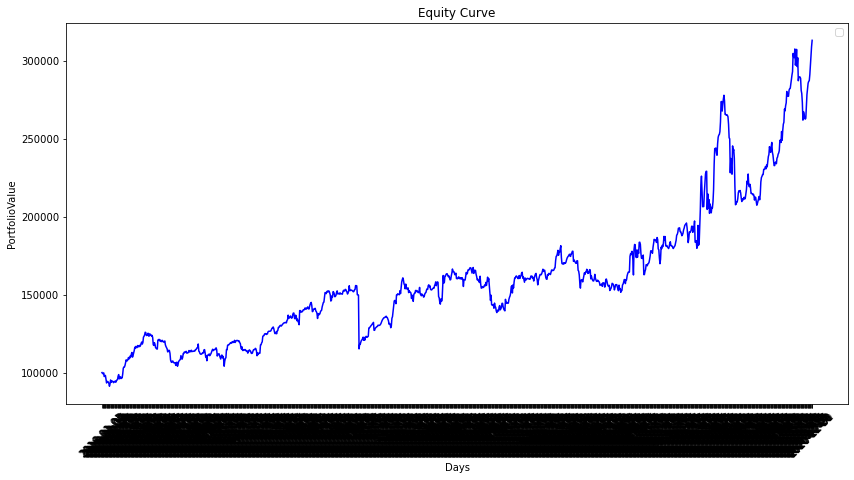

In [42]:
result.to_csv(output_path+"/final4.1.csv")

fig = plt.figure(figsize=(14,7))
plt.title('Equity Curve')
plt.xlabel('Days')
plt.ylabel('PortfolioValue')
plt.plot((result["BANKNIFTY_Date_CE"]).astype('str'),result['PortfolioValue'], c = 'blue')

plt.xticks(rotation=45)

plt.legend()
plt.show()

In [43]:
finallist = pd.DataFrame()
tradelist = result[ (result["D_marker"] == "F") | (result["D_marker"] == "L") ]

if list(tradelist.iloc[[-1]]["D_marker"])[0] == "F":
    tradelist.drop(tradelist.tail(1).index,inplace=True)
else:
    tradelist = tradelist

tr1 = tradelist[tradelist["D_marker"]=="F"].reset_index().drop(columns = ["index"])
tr2 = tradelist[tradelist["D_marker"]=="L"].reset_index().drop(columns = ["index"])

print(tr1.shape[0])
if tr1.shape[0] == tr2.shape[0]:
    for idx in tr1.index:
        mdict = {}
        mdict["Entry_Date"] = tr1[index+ "_Date_CE"][idx]
        mdict["Exit_Date"] = tr2[index+ "_Date_CE"][idx]
        mdict["Trade_Type"] = tr1["Trade_Type"][idx]
        for i in symbols:
            for j in ["CE","PE"]:
                mdict[i + "_Entry_Price_" + j] = tr1[i + "_OPT_Close_" + j][idx] 
                mdict[i + "_Exit_Price_" + j] = tr2[i + "_OPT_Close_" + j][idx]
                mdict[i + "_Qty_" + j] = tr1[i + "_qty_final"][idx]
        temp = pd.DataFrame([mdict])
        #display(temp)
        finallist = finallist.append(temp)
else:
    print("Error, Tradelist not proper")

finallist.reset_index().drop(columns = ["index"])

60


<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finallist = finallist.append(temp)
<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finallist = finallist.append(temp)
<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finallist = finallist.append(temp)
<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finallist = finallist.append(temp)
<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final

<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finallist = finallist.append(temp)
<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finallist = finallist.append(temp)
<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finallist = finallist.append(temp)
<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finallist = finallist.append(temp)
<ipython-input-43-56f5db19d2fa>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final

,Entry_Date,Exit_Date,Trade_Type,AXISBANK_Entry_Price_CE,AXISBANK_Exit_Price_CE,AXISBANK_Qty_CE,AXISBANK_Entry_Price_PE,AXISBANK_Exit_Price_PE,AXISBANK_Qty_PE,BANDHANBNK_Entry_Price_CE,...,YESBANK_Qty_CE,YESBANK_Entry_Price_PE,YESBANK_Exit_Price_PE,YESBANK_Qty_PE,BANKNIFTY_Entry_Price_CE,BANKNIFTY_Exit_Price_CE,BANKNIFTY_Qty_CE,BANKNIFTY_Entry_Price_PE,BANKNIFTY_Exit_Price_PE,BANKNIFTY_Qty_PE
0,2016-01-01,2016-01-28,LISS,14.70,0.05,46.306587,12.10,44.35,46.306587,0.00,...,142.216761,4.59,13.69,142.216761,369.05,0.0500,14.676701,272.50,1601.2002,14.676701
1,2016-01-29,2016-02-25,LISS,14.50,0.05,48.117866,14.80,31.80,48.117866,0.00,...,131.570277,5.12,13.90,131.570277,390.55,0.0500,15.198053,357.95,1941.1504,15.198053
2,2016-02-26,2016-03-31,LISS,18.90,54.15,55.830421,20.35,0.05,55.830421,0.00,...,157.090403,6.09,0.05,157.090403,458.15,2329.9502,18.735008,414.15,0.0500,18.735008
3,2016-04-01,2016-04-28,LISS,17.40,18.05,53.741044,16.25,0.05,53.741044,0.00,...,141.293218,6.45,0.05,141.293218,437.45,507.9004,17.957032,384.10,0.0500,17.957032
4,2016-04-29,2016-05-26,LISS,18.85,49.00,54.600944,13.15,0.05,54.600944,0.00,...,136.770168,6.19,0.05,136.770168,429.30,556.5996,18.458748,345.65,0.0500,18.458748
5,2016-05-27,2016-06-30,LISS,21.45,23.50,49.139109,14.95,0.05,49.139109,0.00,...,122.763918,6.34,0.05,122.763918,398.40,414.1504,17.259748,408.45,0.0500,17.259748
6,2016-07-01,2016-07-28,LISS,16.85,3.85,41.196636,17.15,0.05,41.196636,0.00,...,98.989351,6.42,0.05,98.989351,390.45,1085.1992,14.938778,333.00,0.0500,14.938778
7,2016-07-29,2016-08-25,LISS,16.85,36.55,42.814590,17.20,0.05,42.814590,0.00,...,96.072921,7.04,0.05,96.072921,397.55,300.1992,14.801321,352.35,0.0500,14.801321
8,2016-08-26,2016-09-29,LISS,15.55,0.05,40.421798,18.25,50.70,40.421798,0.00,...,89.345429,6.16,17.84,89.345429,413.85,45.8496,14.822270,304.40,0.0500,14.822270
9,2016-09-30,2016-10-27,LISS,23.95,0.05,42.769468,19.20,54.35,42.769468,0.00,...,92.266086,9.42,1.28,92.266086,483.20,214.5996,14.379561,389.20,0.0500,14.379561


# Adding Expiry Roll OVer Entry Exit

In [44]:
# finallist_exp = pd.DataFrame()
# expirytrades = result[(result[index+ "_Date_CE"] == result[index+ "_curr_exp_date_CE"]) & (result["D_marker"] == "M")]
# #display(expirytrades)
# for idi, row1 in finallist.iterrows():
#     flag = 0
#     for idi, row2 in expirytrades.iterrows():
#         expdate = row2[index+ "_Date_CE"]
#         d1 = row1["Entry_Date"]
#         d2 = row1["Exit_Date"]
#         #print(expdate)
#         #print(d1)
#         #print(d2)
#         if (d1 < expdate < d2) & (flag ==  0):
#             mdict = {}
#             mdict["Expiry_Date"] = expdate
#             for i in symbols:
#                 for j in ["CE","PE"]:
#                     mdict[i + "_Exp_Adj_Entry_Price_" + j] = row2[i + "_Next_Month_Close_" + j]
#                     mdict[i + "_Exp_Adj_Exit_Price_" + j] = row2[i + "_OPT_Close_" + j]
#             temp = pd.DataFrame([mdict])
#             #display(temp)
#             finallist_exp = finallist_exp.append(temp)
#             flag = 1
#     if flag == 0:
#         mdict = {}
#         mdict["Expiry_Date"] = "NA"
#         for i in symbols:
#             for j in ["CE","PE"]:
#                 mdict[i + "_Exp_Adj_Entry_Price_" + j] = 0
#                 mdict[i + "_Exp_Adj_Exit_Price_" + j] = 0
#         temp = pd.DataFrame([mdict])
#         #display(temp)
#         finallist_exp = finallist_exp.append(temp)


# finallist_exp.reset_index().drop(columns = ["index"])

In [45]:
#tradelist =  pd.concat([finallist, finallist_exp], axis=1)

tradelist = finallist

In [46]:
display(tradelist)

,Entry_Date,Exit_Date,Trade_Type,AXISBANK_Entry_Price_CE,AXISBANK_Exit_Price_CE,AXISBANK_Qty_CE,AXISBANK_Entry_Price_PE,AXISBANK_Exit_Price_PE,AXISBANK_Qty_PE,BANDHANBNK_Entry_Price_CE,...,YESBANK_Qty_CE,YESBANK_Entry_Price_PE,YESBANK_Exit_Price_PE,YESBANK_Qty_PE,BANKNIFTY_Entry_Price_CE,BANKNIFTY_Exit_Price_CE,BANKNIFTY_Qty_CE,BANKNIFTY_Entry_Price_PE,BANKNIFTY_Exit_Price_PE,BANKNIFTY_Qty_PE
0,2016-01-01,2016-01-28,LISS,14.70,0.05,46.306587,12.10,44.35,46.306587,0.00,...,142.216761,4.59,13.69,142.216761,369.05,0.0500,14.676701,272.50,1601.2002,14.676701
0,2016-01-29,2016-02-25,LISS,14.50,0.05,48.117866,14.80,31.80,48.117866,0.00,...,131.570277,5.12,13.90,131.570277,390.55,0.0500,15.198053,357.95,1941.1504,15.198053
0,2016-02-26,2016-03-31,LISS,18.90,54.15,55.830421,20.35,0.05,55.830421,0.00,...,157.090403,6.09,0.05,157.090403,458.15,2329.9502,18.735008,414.15,0.0500,18.735008
0,2016-04-01,2016-04-28,LISS,17.40,18.05,53.741044,16.25,0.05,53.741044,0.00,...,141.293218,6.45,0.05,141.293218,437.45,507.9004,17.957032,384.10,0.0500,17.957032
0,2016-04-29,2016-05-26,LISS,18.85,49.00,54.600944,13.15,0.05,54.600944,0.00,...,136.770168,6.19,0.05,136.770168,429.30,556.5996,18.458748,345.65,0.0500,18.458748
0,2016-05-27,2016-06-30,LISS,21.45,23.50,49.139109,14.95,0.05,49.139109,0.00,...,122.763918,6.34,0.05,122.763918,398.40,414.1504,17.259748,408.45,0.0500,17.259748
0,2016-07-01,2016-07-28,LISS,16.85,3.85,41.196636,17.15,0.05,41.196636,0.00,...,98.989351,6.42,0.05,98.989351,390.45,1085.1992,14.938778,333.00,0.0500,14.938778
0,2016-07-29,2016-08-25,LISS,16.85,36.55,42.814590,17.20,0.05,42.814590,0.00,...,96.072921,7.04,0.05,96.072921,397.55,300.1992,14.801321,352.35,0.0500,14.801321
0,2016-08-26,2016-09-29,LISS,15.55,0.05,40.421798,18.25,50.70,40.421798,0.00,...,89.345429,6.16,17.84,89.345429,413.85,45.8496,14.822270,304.40,0.0500,14.822270
0,2016-09-30,2016-10-27,LISS,23.95,0.05,42.769468,19.20,54.35,42.769468,0.00,...,92.266086,9.42,1.28,92.266086,483.20,214.5996,14.379561,389.20,0.0500,14.379561


In [47]:
tradelist.to_csv(output_path+"/trdlist.csv")

In [48]:
####FOR NEXT MONTH CLOSE######

# pl_tradelist = tradelist.copy()
# plvalue = []
# pval = 0
# for idi, row in pl_tradelist.iterrows():

#     if row["Trade_Type"] == "SILS":
#         pvalce = row[index + "_Qty_CE"]*((row[index + "_Entry_Price_CE"] - row[index + "_Exp_Adj_Exit_Price_CE"])+(row[index + "_Exp_Adj_Entry_Price_CE"] - row[index + "_Exit_Price_CE"]))
#         pvalpe = row[index + "_Qty_PE"]*((row[index + "_Entry_Price_PE"] - row[index + "_Exp_Adj_Exit_Price_PE"])+(row[index + "_Exp_Adj_Entry_Price_PE"] - row[index + "_Exit_Price_PE"]))
#         pval = pvalce + pvalpe

#         for i in stock_list:
#             pvalce = row[i + "_Qty_CE"]*((row[i + "_Exp_Adj_Exit_Price_CE"] - row[i + "_Entry_Price_CE"])+(row[i + "_Exit_Price_CE"] - row[i + "_Exp_Adj_Entry_Price_CE"]))
#             pvalpe = row[i + "_Qty_PE"]*((row[i + "_Exp_Adj_Exit_Price_PE"] - row[i + "_Entry_Price_PE"])+(row[i + "_Exit_Price_PE"] - row[i + "_Exp_Adj_Entry_Price_PE"]))
#             pval += pvalce + pvalpe    

#     if row["Trade_Type"] == "LISS":
#         pvalce = row[index + "_Qty_CE"]*((row[index + "_Exp_Adj_Exit_Price_CE"] - row[index + "_Entry_Price_CE"])+(row[index + "_Exit_Price_CE"] - row[index + "_Exp_Adj_Entry_Price_CE"]))
#         pvalpe = row[index + "_Qty_PE"]*((row[index + "_Exp_Adj_Exit_Price_PE"] - row[index + "_Entry_Price_PE"])+(row[index + "_Exit_Price_PE"] - row[index + "_Exp_Adj_Entry_Price_PE"]))
#         pval = pvalce + pvalpe

#         for i in stock_list:
#             pvalce = row[i + "_Qty_CE"]*((row[i + "_Entry_Price_CE"] - row[i + "_Exp_Adj_Exit_Price_CE"])+(row[i + "_Exp_Adj_Entry_Price_CE"] - row[i + "_Exit_Price_CE"]))
#             pvalpe = row[i + "_Qty_PE"]*((row[i + "_Entry_Price_PE"] - row[i + "_Exp_Adj_Exit_Price_PE"])+(row[i + "_Exp_Adj_Entry_Price_PE"] - row[i + "_Exit_Price_PE"]))
#             pval += pvalce + pvalpe    

#     plvalue.append(pval)
                    
# pl_tradelist['pl'] = plvalue
# pl_tradelist.to_csv(output_path+"\pl_trdlist.csv")




In [49]:
pl_tradelist = tradelist.copy()
plvalue = []
pval = 0
for idi, row in pl_tradelist.iterrows():

    if row["Trade_Type"] == "SILS":
        pvalce = row[index + "_Qty_CE"]*(row[index + "_Entry_Price_CE"] - row[index + "_Exit_Price_CE"])
        pvalpe = row[index + "_Qty_PE"]*(row[index + "_Entry_Price_PE"] - row[index + "_Exit_Price_PE"])
        pval = pvalce + pvalpe

        for i in stock_list:
            pvalce = row[i + "_Qty_CE"]*(row[i + "_Exit_Price_CE"] - row[i + "_Entry_Price_CE"])
            pvalpe = row[i + "_Qty_PE"]*(row[i + "_Exit_Price_PE"] - row[i + "_Entry_Price_PE"])
            pval += pvalce + pvalpe    

    if row["Trade_Type"] == "LISS":
        pvalce = row[index + "_Qty_CE"]*(row[index + "_Exit_Price_CE"] - row[index + "_Entry_Price_CE"])
        pvalpe = row[index + "_Qty_PE"]*(row[index + "_Exit_Price_PE"] - row[index + "_Entry_Price_PE"])
        pval = pvalce + pvalpe

        for i in stock_list:
            pvalce = row[i + "_Qty_CE"]*(row[i + "_Entry_Price_CE"] - row[i + "_Exit_Price_CE"])
            pvalpe = row[i + "_Qty_PE"]*(row[i + "_Entry_Price_PE"] - row[i + "_Exit_Price_PE"])
            pval += pvalce + pvalpe    

    plvalue.append(pval)
                    
pl_tradelist['pl'] = plvalue
pl_tradelist.to_csv(output_path+"\pl_trdlist.csv")




In [50]:
### Calculate CAGR 

df = result.copy()
from pyxirr import xirr

firstValue = round(df.loc[0, 'PortfolioValue'],4)
lastValue = round(df.loc[df.index[-1], 'PortfolioValue'],4)

firstDate = (df.loc[0, 'BANKNIFTY_Date_CE'])
lastDate = (df.loc[df.index[-1], 'BANKNIFTY_Date_CE'])

dates = [firstDate, lastDate]
amounts = [-firstValue, lastValue]

xirr = xirr(dates, amounts)

print(xirr)
### Calculate Daily Drawdown

Roll_Max = round(df['PortfolioValue'].expanding().max(), 2)
Daily_Drawdown = (round(df['PortfolioValue'], 2)/Roll_Max) - 1.0


#Roll_Max[0:50], Daily_Drawdown[0:50]

df['Daily_Drawdown'] = Daily_Drawdown * 100

print("max dd", min(df['Daily_Drawdown']))

df.to_csv(output_path + '/DailyDrawdown.csv', index=False)

### Monthly PNL Percentage 

df['BANKNIFTY_Date_CE'] = pd.to_datetime(df['BANKNIFTY_Date_CE'], dayfirst=True)

df['Year'] = pd.DatetimeIndex(df['BANKNIFTY_Date_CE']).year
df['Month'] = pd.DatetimeIndex(df['BANKNIFTY_Date_CE']).month
df.to_csv(output_path + '/df.csv', index=False)

i = 0
dfg = df.groupby(['Year', 'Month'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Monthly'] = round(change * 100, 2)
    
i = 0
dfg = df.groupby(['Year'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Yearly'] = change * 100
    
df

df1 = df[['Year', 'Month', 'Change_%_Monthly', 'Change_%_Yearly']]
df1 = df1.drop_duplicates()
df1

pivotTable = df1.pivot_table(values ='Change_%_Monthly', index =['Year', 'Change_%_Yearly'],
                         columns =['Month'])
pivotTable.columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                      'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

pivotTable.index

def _color_red_or_green(val):
    color = '#EE0000' if val < 0 else '#00EE00'
    return 'background-color: %s' % color
pivotTable.style.applymap(_color_red_or_green)




0.2563127850353015
max dd -26.071158660469617


,,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,Change_%_Yearly,,,,,,,,,,,,
2016,14.175953,-5.670000,10.940000,10.900000,6.680000,-2.780000,-10.810000,4.550000,2.660000,-3.550000,0.420000,6.790000,-4.200000
2017,18.775538,1.200000,7.680000,3.620000,4.680000,2.960000,1.260000,7.070000,0.040000,1.290000,-21.010000,5.440000,6.680000
2018,18.134110,10.730000,1.620000,-1.400000,2.060000,5.470000,-1.030000,4.190000,-7.680000,-6.980000,-2.340000,14.700000,-0.290000
2019,12.681703,1.690000,1.760000,2.490000,0.840000,-4.030000,-3.600000,-3.310000,-0.430000,12.930000,-5.510000,13.480000,-2.310000
2020,73.472258,5.470000,1.820000,11.050000,13.200000,8.990000,-18.880000,-0.250000,7.200000,1.560000,18.500000,4.490000,8.090000
